In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(3%)')
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,...,-61541.905533,-1059.042606,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,...,-4823.472569,-168.146428,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,...,-117104.605466,-3804.051175,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,...,-4396.445439,-901.413470,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,...,-77276.296027,-4116.308632,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005


In [5]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
filtered_df.shape

(70, 34)

,ID,TypeOfTraining,TotalKnowledge,Enjoyable,Interesting,Fun,Informative,Boring,WasteofTime
45,R_8BrsnWtg55gXMYR,Non-gamified Training,0.61364,6.0,6.0,4.0,6.0,5.0,2.0
46,R_dbuSr5dKnnNQt6d,Non-gamified Training,0.59091,4.0,6.0,4.0,6.0,2.0,2.0
47,R_d57BRo9VCyNuyAB,Non-gamified Training,0.54545,6.0,6.0,6.0,7.0,2.0,2.0
48,R_brsOdUPEqj0GtVP,Non-gamified Training,0.59091,6.0,7.0,5.0,7.0,3.0,2.0
49,R_6ige8ERnC8AXlat,Non-gamified Training,0.50000,6.0,7.0,6.0,7.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
111,R_1RdlrYUwr7NrXGl,Gamified Training,0.56818,5.0,4.0,4.0,5.0,2.0,2.0
112,R_2f5cLI2iSlKmjg9,Gamified Training,0.40909,6.0,6.0,6.0,6.0,2.0,2.0
113,R_cMV49tCT5mXJlDT,Gamified Training,0.59091,6.0,6.0,6.0,6.0,2.0,2.0
114,R_0DnN5hhkU02wSyh,Gamified Training,0.52273,5.0,5.0,5.0,6.0,3.0,5.0


In [5]:
# Convert "TypeOfTraining" to binary (0 for "No Training", 1 for others)
data['TypeOfTraining'] = data['TypeOfTraining'].apply(lambda x: 0 if x == "No Training" else 1)

# Define features (X) and target variable (y)
X = data.drop(columns=["ID", "TypeOfTraining"])
y = data["TypeOfTraining"]

# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (you can choose another classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[15]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



C:\Users\ianpe\AppData\Local\Temp\ipykernel_29804\2681199683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TypeOfTraining'] = data['TypeOfTraining'].apply(lambda x: 0 if x == "No Training" else 1)


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


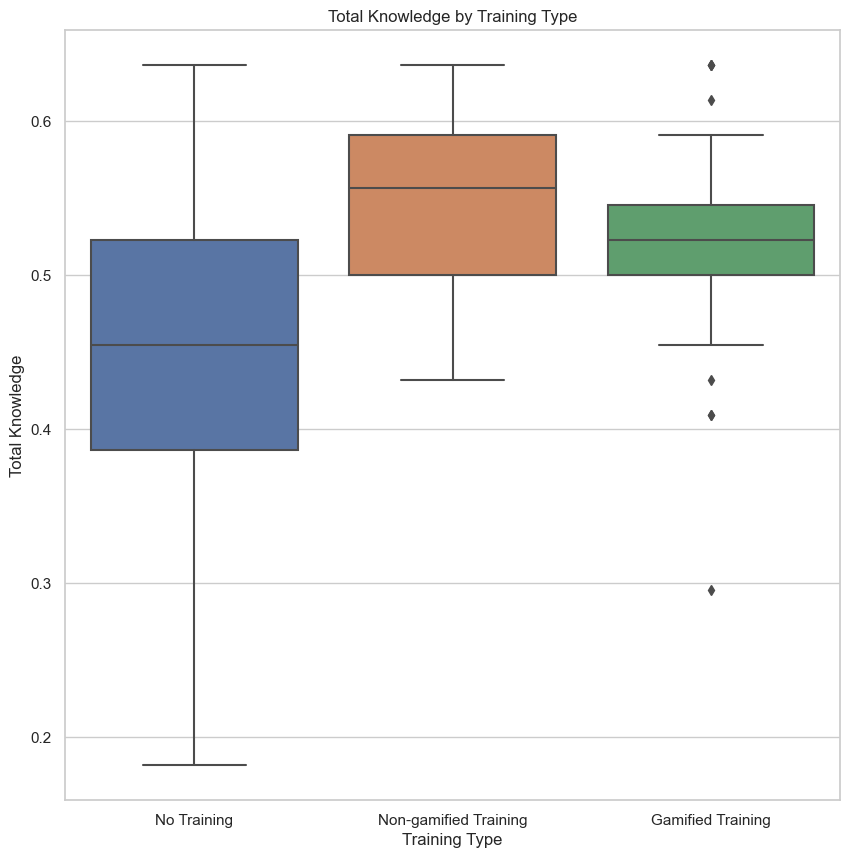

In [52]:
# Create a boxplot of Total Knowledge by Training Type
plt.figure(figsize=(10, 10))
sns.boxplot(x="TypeOfTraining", y="TotalKnowledge", data=data_orig)
plt.xlabel("Training Type")
plt.ylabel("Total Knowledge")
plt.title("Total Knowledge by Training Type")
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

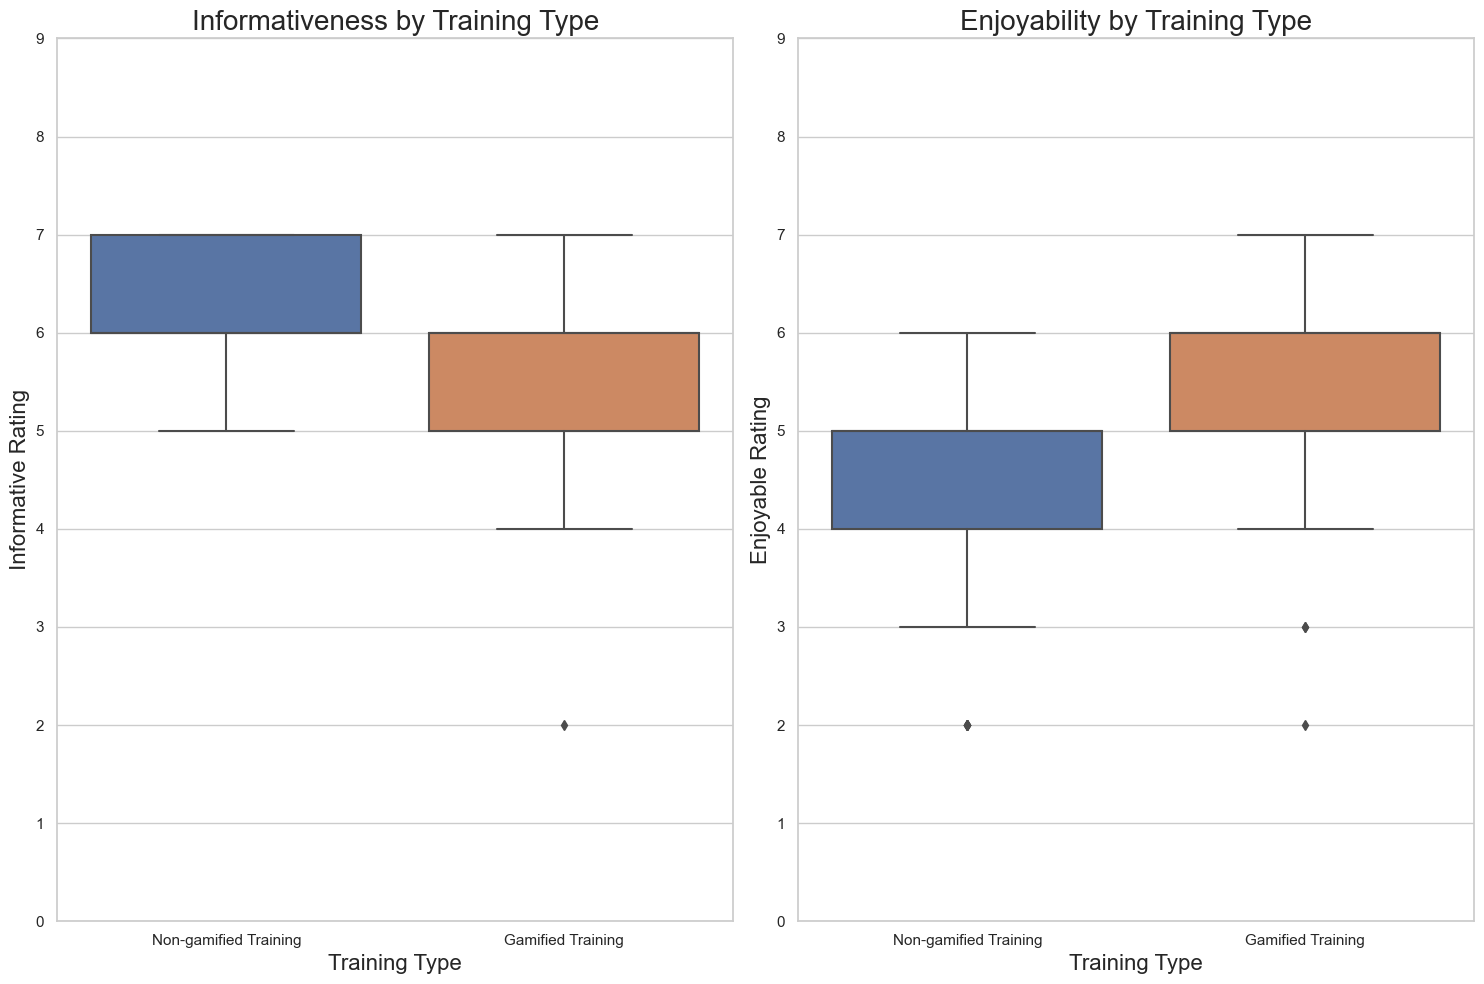

In [50]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Informative", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Informative Rating", fontsize=16)
axes[0].set_title("Informativeness by Training Type", fontsize=20)
axes[0].set_ylim(0, 9)  # Set the y-axis limits

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="Enjoyable", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("Enjoyable Rating", fontsize=16)
axes[1].set_title("Enjoyability by Training Type", fontsize=20)
axes[1].set_ylim(0, 9)  # Set the y-axis limits

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

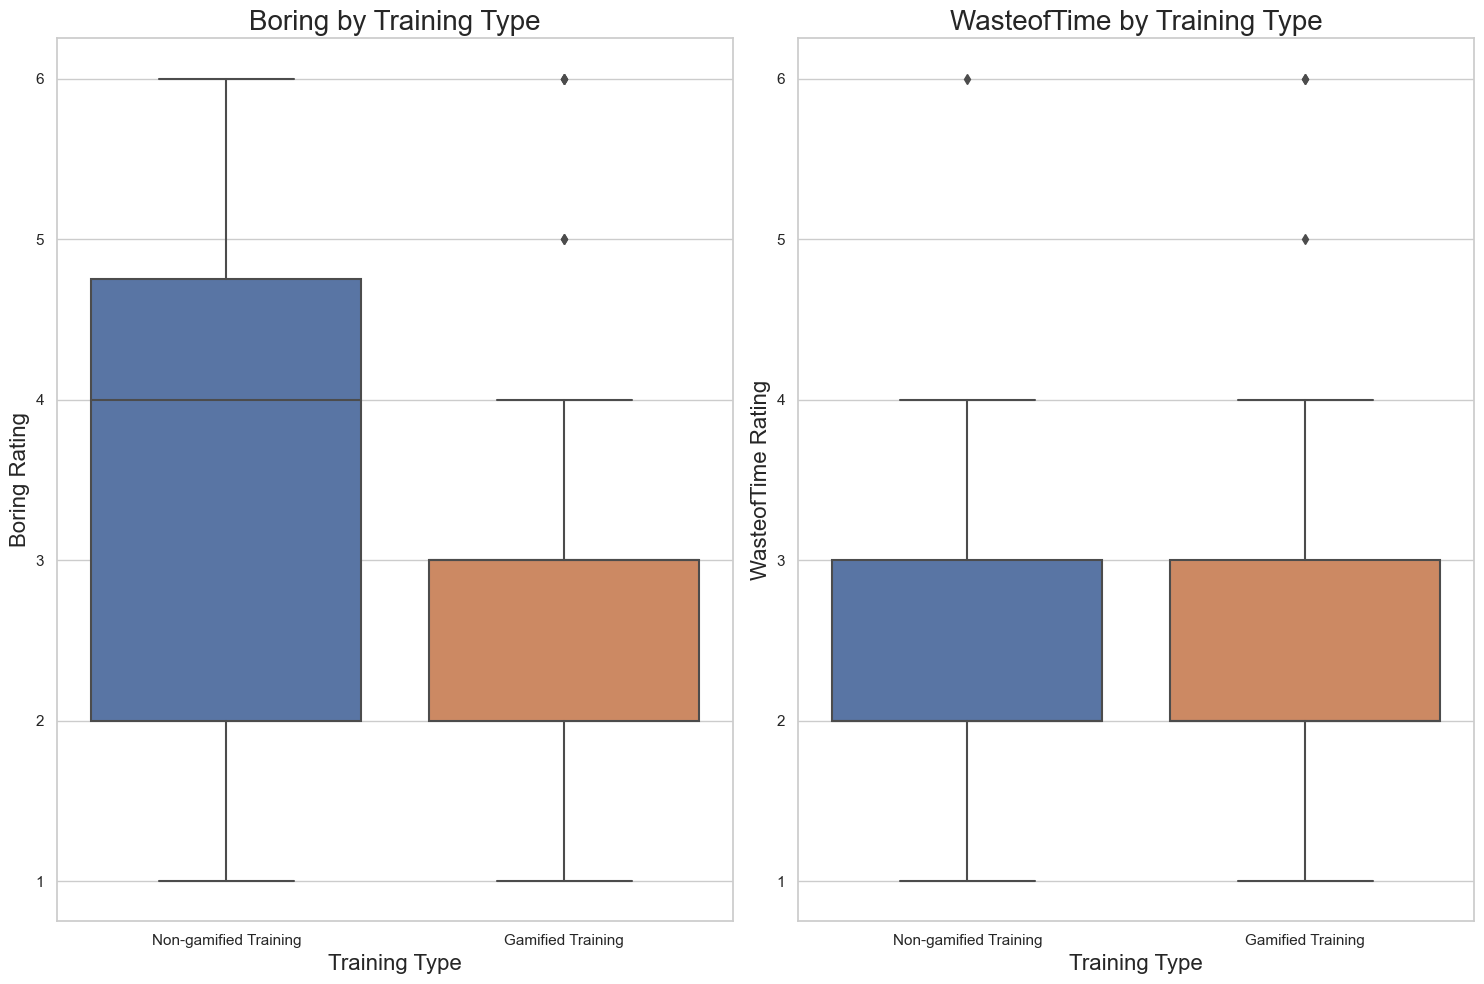

In [36]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Boring", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Boring Rating", fontsize=16)
axes[0].set_title("Boring by Training Type", fontsize=20)

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="WasteofTime", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("WasteofTime Rating", fontsize=16)
axes[1].set_title("WasteofTime by Training Type", fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

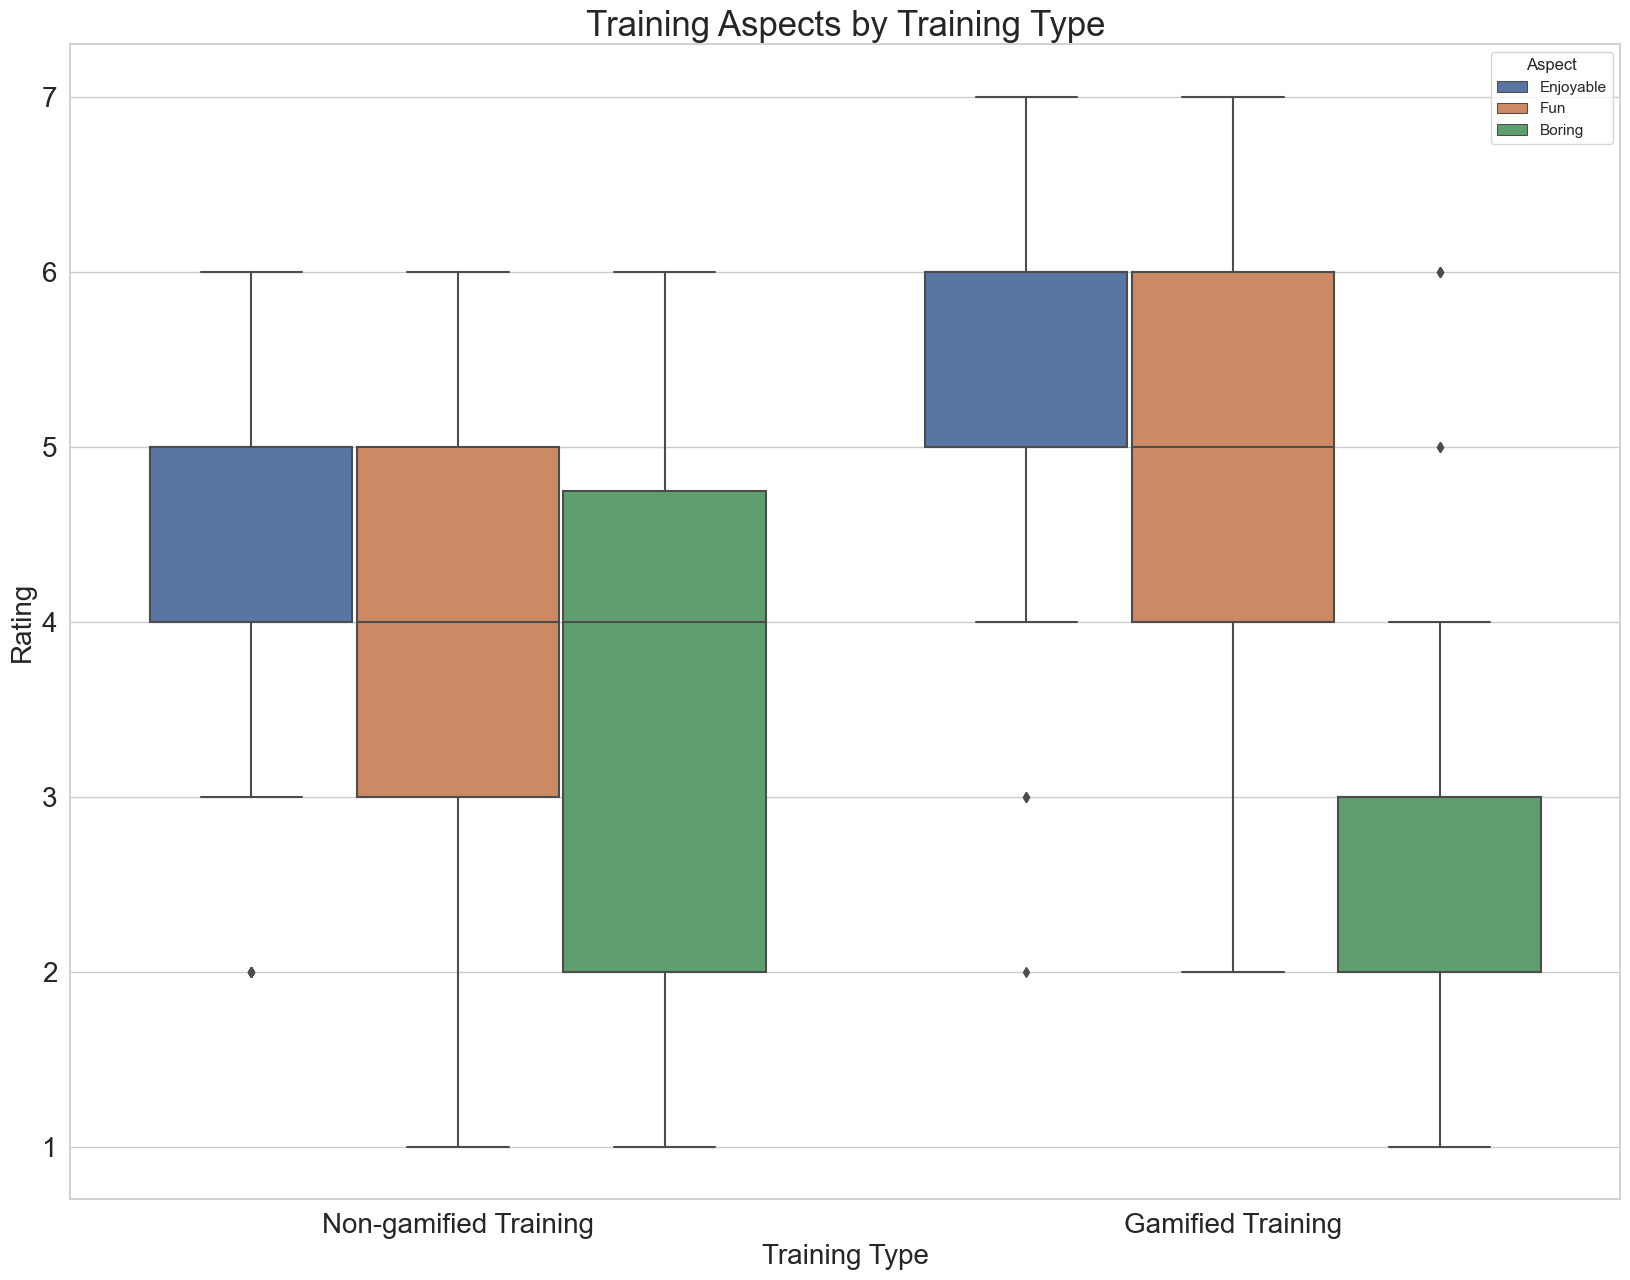

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["Enjoyable", "Fun", "Boring"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

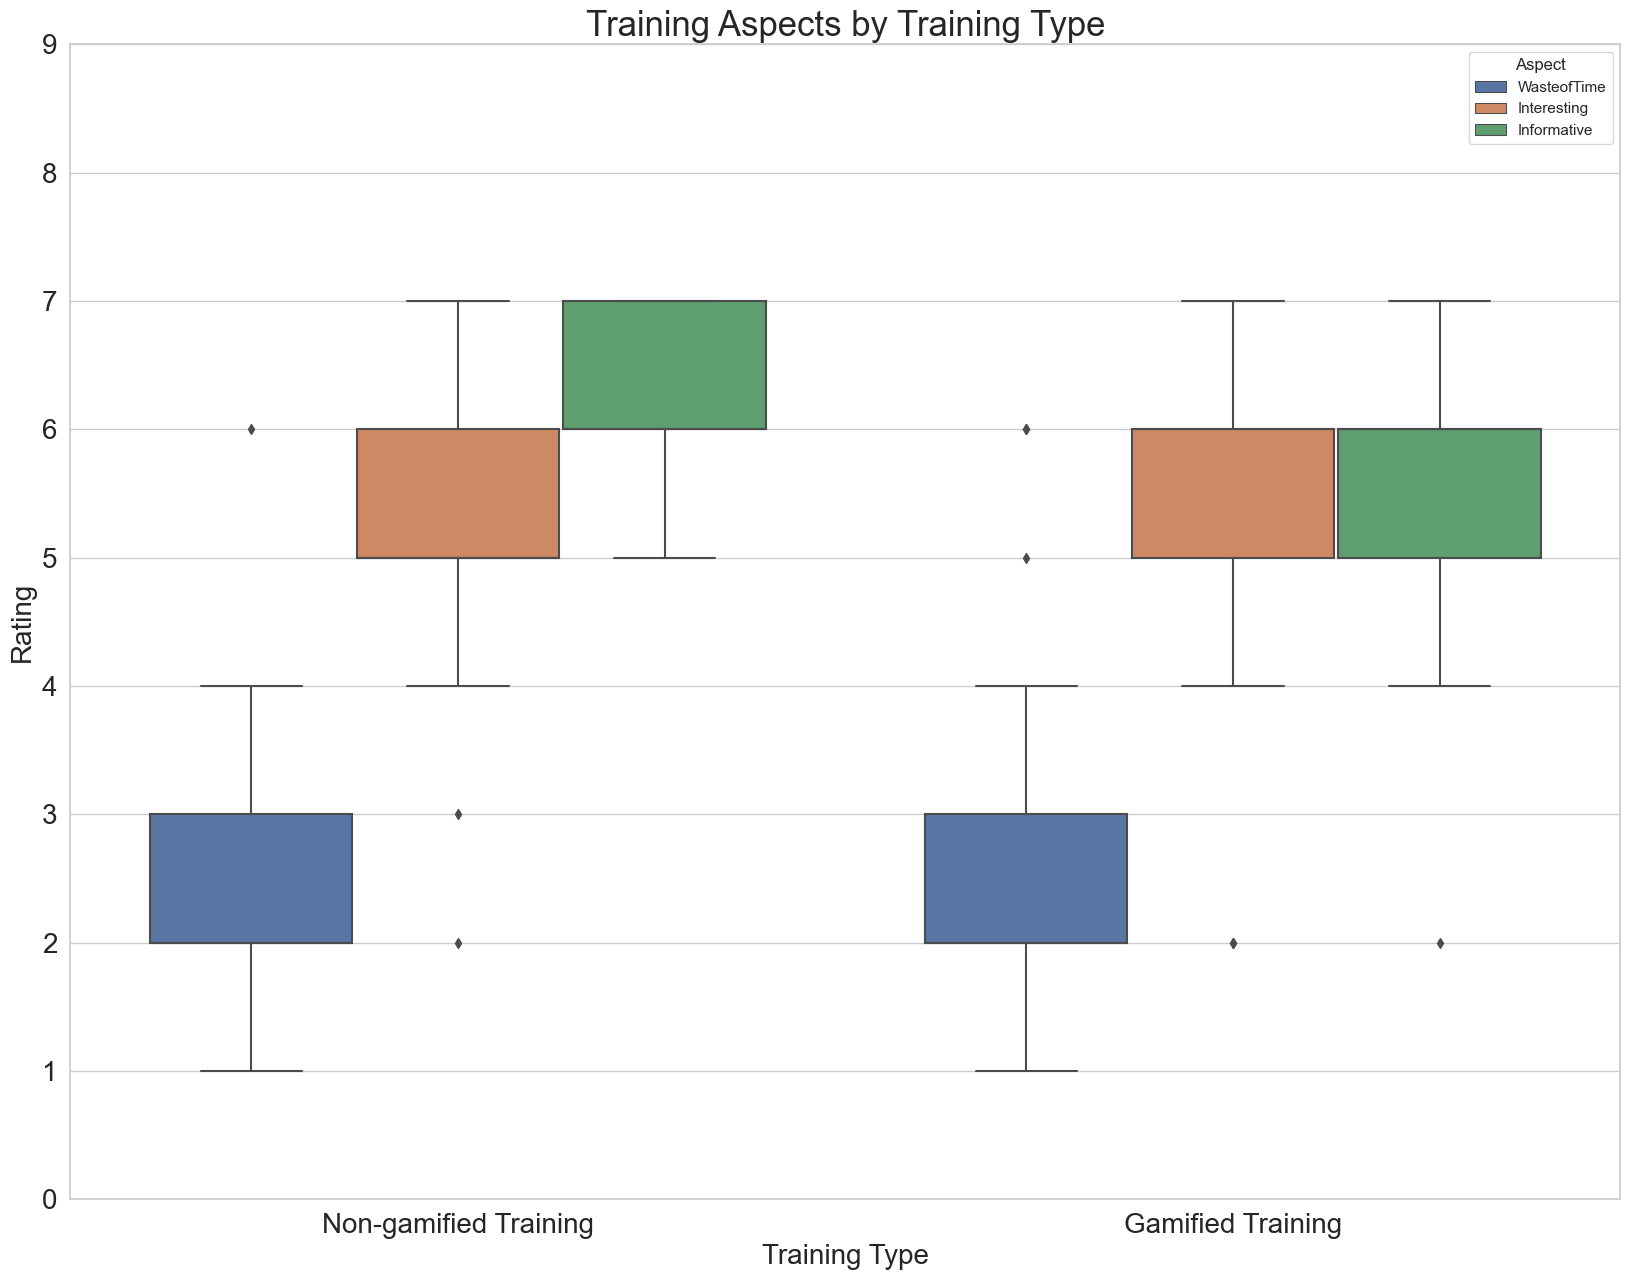

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 
plt.ylim(0, 9)

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

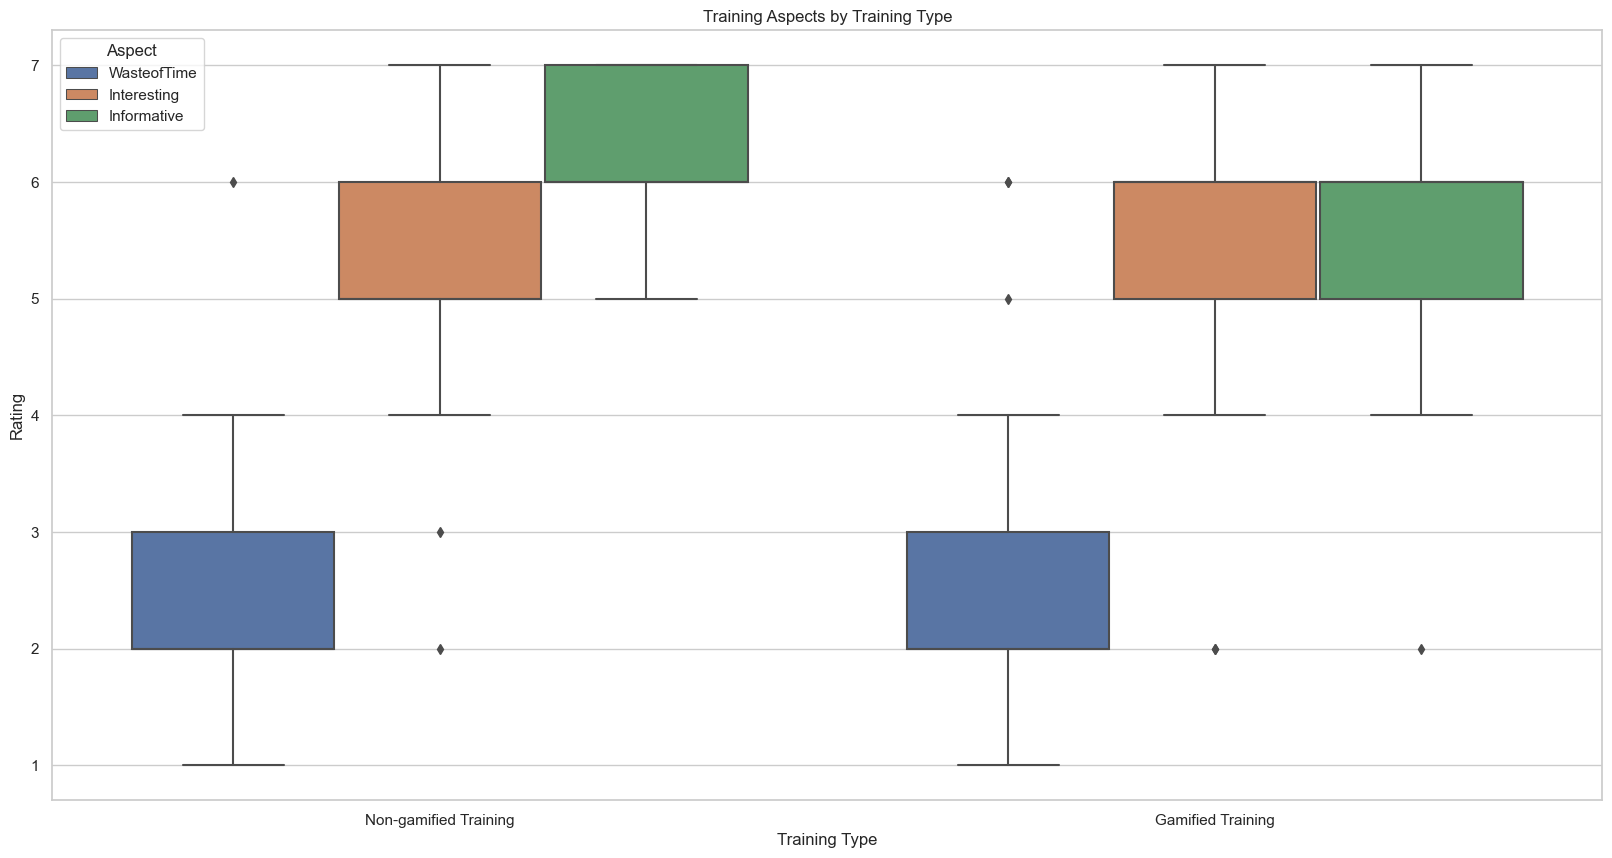

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

NameError: name 'np' is not defined

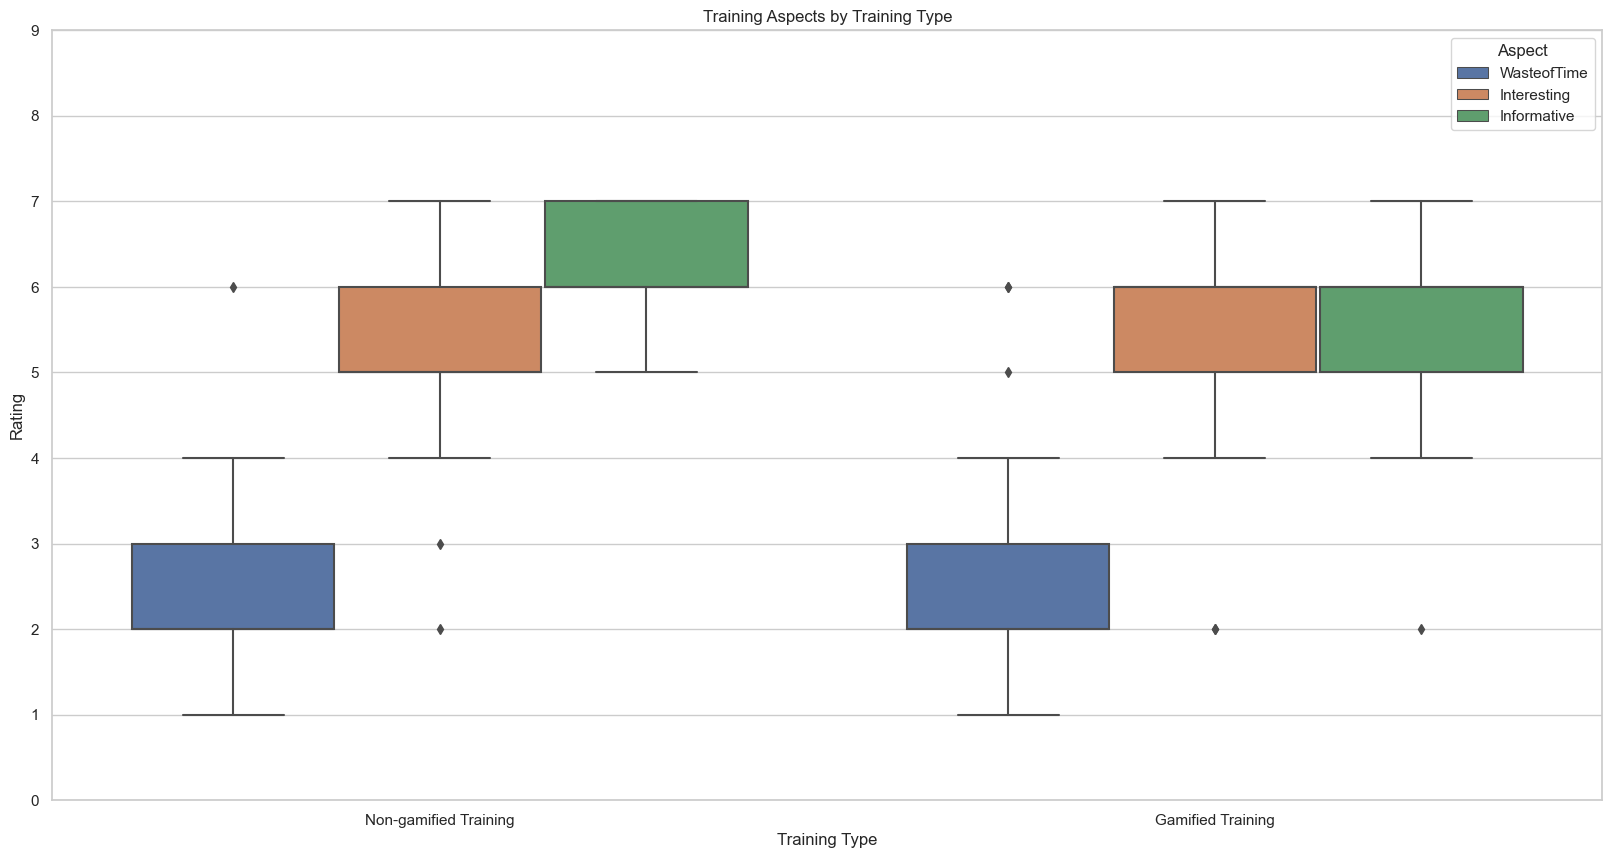

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")
plt.ylim(0, 9)

# Add mean lines
medians = combined_data.groupby(['TypeOfTraining', 'Aspect'])['Rating'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 9, median_labels[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

# Set the y-axis limit to 9

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

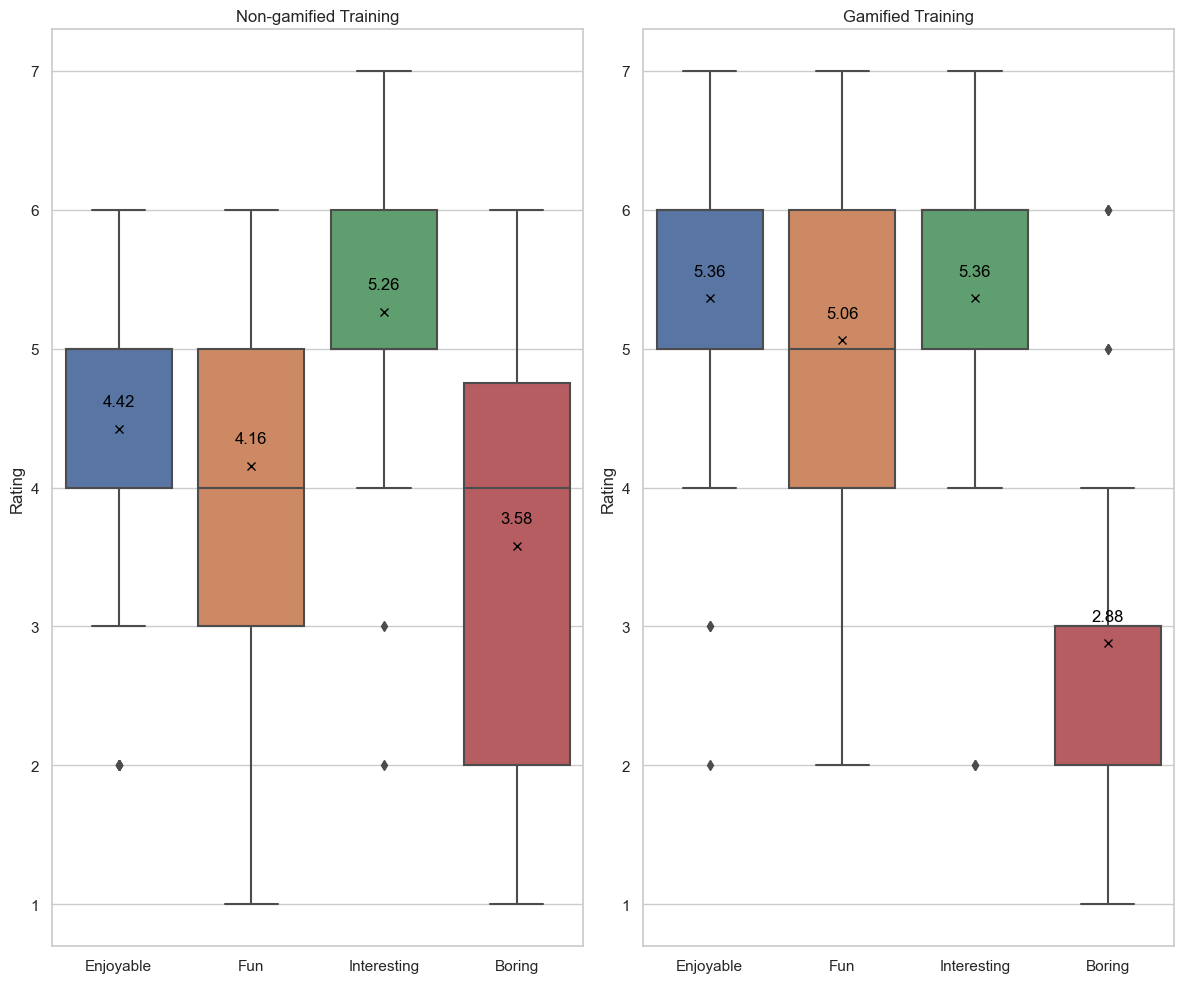

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][['Enjoyable', 'Fun', 'Interesting', 'Boring']].mean()
    offset = 0.25
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

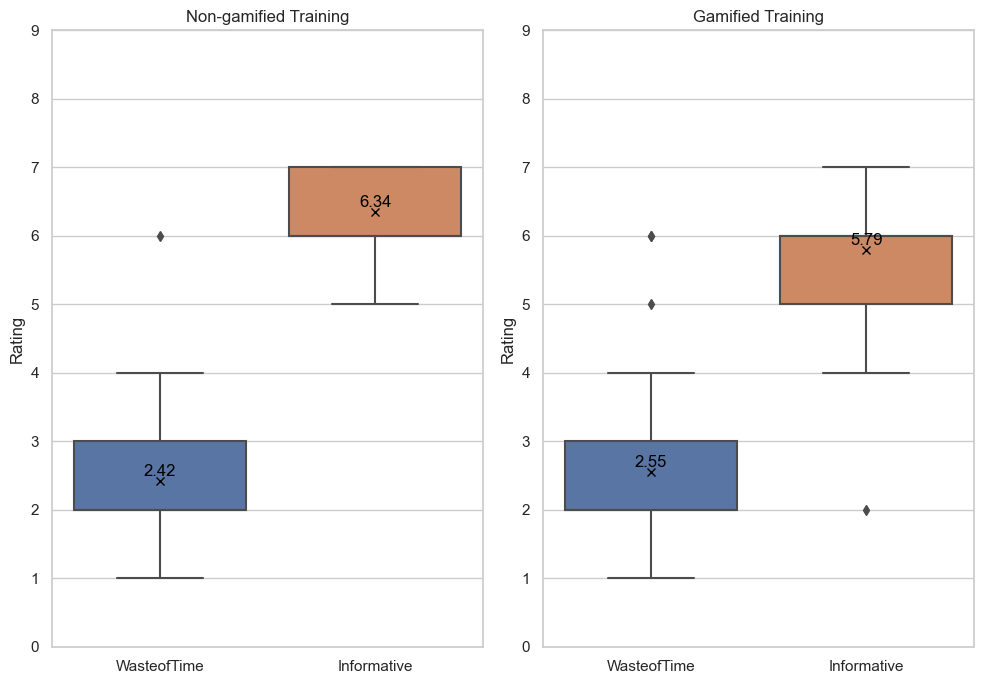

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[["WasteofTime", "Informative"]], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[["WasteofTime", "Informative"]], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][["WasteofTime", "Informative"]].mean()
    offset = 0.2
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_ylim(0, 9)
axes[1].set_ylim(0, 9)
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


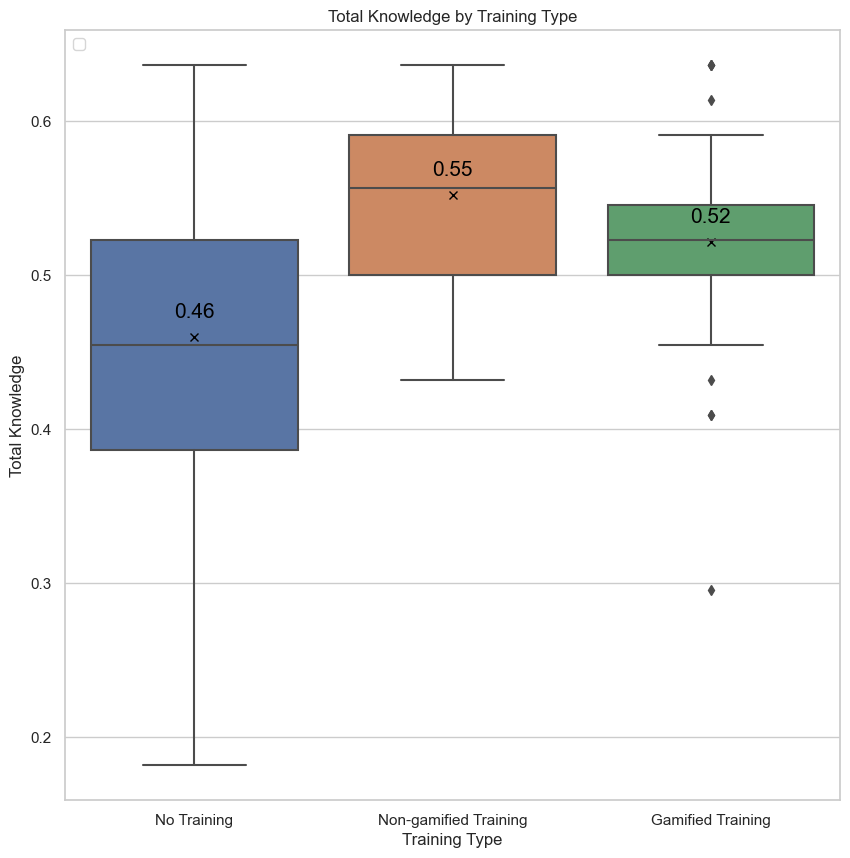

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map training types to colors

# Create a boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data)

averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
new_order = ['No Training', 'Non-gamified Training', 'Gamified Training']
averages = averages[new_order]
for i, avg in enumerate(averages):
    plt.plot(i, avg, 'x', markeredgecolor='black' ,markerfacecolor='black')
    plt.text(i, avg + 0.01, f'{avg:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [100]:
averages

TypeOfTraining
Gamified Training        0.521349
No Training              0.459596
Non-gamified Training    0.552033
Name: TotalKnowledge, dtype: float64

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


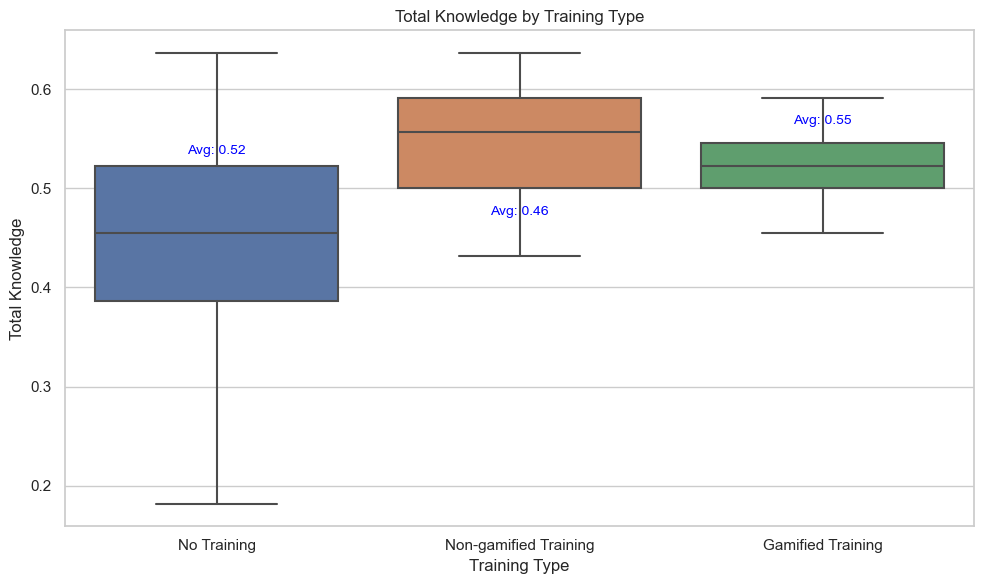

In [89]:


# Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data, showfliers=False)  # showfliers=False removes outliers

# Calculate and annotate the average Total Knowledge for each training type
averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.01, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')

# Show the plot
plt.tight_layout()
plt.show()
